# Dell Stock prediction - LSTM
#### 1. inputs data is the last 60 data of train data plus true test data
#### 2. inputs data is the last 60 data of train data only (not use true test data)

### RNNs
RNNs are a type of neural network that is used for sequential data, such as time series or text. They are characterized by their ability to take in a sequence of inputs and produce a sequence of outputs, while maintaining a "memory" of past inputs. However, traditional RNNs suffer from the vanishing gradient problem, which occurs when the gradient of the loss function with respect to the weights becomes too small, making it difficult to learn long-term dependencies in the data.
### LSTM
LSTM stands for Long Short-Term Memory, and it is a type of Recurrent Neural Network (RNN) architecture that is designed to better handle the vanishing gradient problem that arises in traditional RNNs.
### The vanishing gradient problem 
The vanishing gradient problem is a phenomenon that can occur during the training of neural networks, particularly deep neural networks with many layers. During backpropagation, the gradients of the loss function with respect to the weights in the earlier layers of the network can become extremely small, which means that the weights in these layers are updated very slowly or not at all.


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

2024-05-16 11:05:21.380665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-16 11:05:21.380761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-16 11:05:21.517178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
dataset = pd.read_csv("/kaggle/input/dell-stock-data-latest-and-updated/DELL_stock_history.csv",sep='\t')
print(len(dataset))
print(dataset.columns.tolist())

1099
['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


In [3]:
dataset_train=dataset.iloc[-1000:-100]
dataset_test=dataset.iloc[-100:]

# dataset_train

In [4]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[15.09262883],
       [15.08728061],
       [15.30930983],
       [15.30128369],
       [15.38420938]])

## MinMaxScaler
MinMaxScaler is used to scale the values of data to a range of 0 to 1.

In [5]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.05429738]
 [0.05402907]
 [0.06516769]
 [0.06476504]
 [0.0689252 ]]
900


In [6]:
x_train = []
y_train = []

* x_train is data during the past 60 days. 
* y_data is the data of the day after the last day of x_train

In [7]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


This code is reshaping the input data x_train into a 3D tensor with dimensions (samples, time steps, features) which is required as input for a Long Short-Term Memory (LSTM) neural network.

The reshaping step is necessary because LSTMs require input data to be in a specific format, where:

* samples refers to the number of input sequences (or samples) in the dataset
* time steps refers to the number of time steps in each input sequence
* features refers to the number of features (or variables) in each time step of the input sequence


In [8]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [9]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =300, batch_size = 32)

Epoch 1/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0860
Epoch 2/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0174
Epoch 3/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143
Epoch 4/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132
Epoch 5/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106
Epoch 6/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0099
Epoch 7/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107
Epoch 8/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094
Epoch 9/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0077
Epoch 10/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0078
Epoch 11/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0074
Epoch 12/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0067
Epoch 13/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082
Epoch 14/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0071
Epoch 15/300
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

# dataset_test

In [11]:
real_stock_price = dataset_test.iloc[:,1:2].values

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)

## 1. inputs data is the last 60 data of train data plus true test data

In [12]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

1000 100
(160,)


In the context of a LSTM model, this reshaping may be necessary if the input data has only one feature (i.e., one time series) and the LSTM model expects a 3D input shape of (n_samples, n_time_steps, n_features). In this case, since there is only one feature, the shape does not change.

In [13]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)

#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [14]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60)
(100, 60, 1)


In [15]:
predicted_price = regressor.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


In [16]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


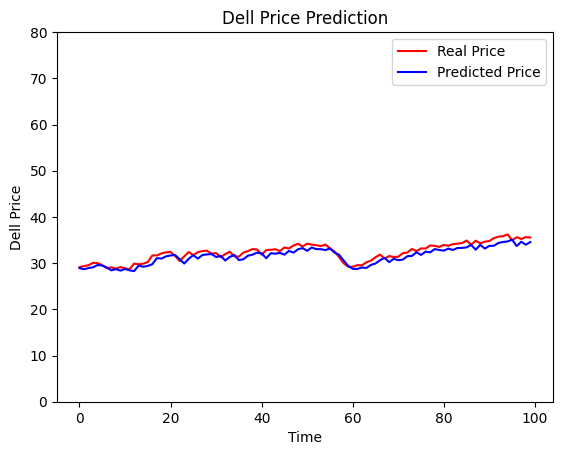

In [17]:
plt.plot(real_stock_price[-100:],color = 'red', label = 'Real Price')
plt.plot(predicted_price[-100:], color = 'blue', label = 'Predicted Price')
plt.title('Dell Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dell Price')
plt.ylim(0,80)  
plt.legend()
plt.show()

## 2. inputs data is the last 60 data of train data only (not use true test data)

In [18]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

In [19]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


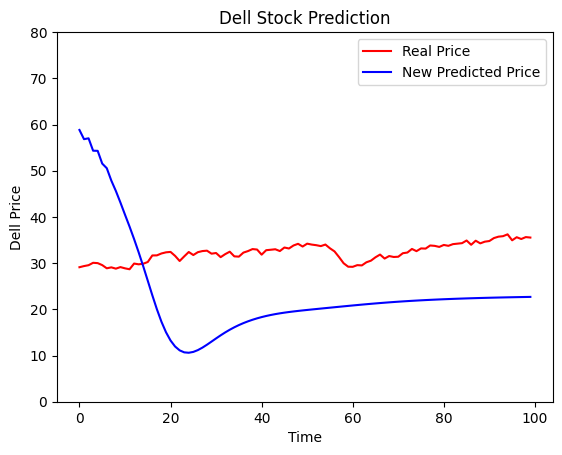

In [20]:
plt.plot(real_stock_price[-100:],color = 'red', label = 'Real Price')
plt.plot(new_predicted_price[-100:], color = 'blue', label = 'New Predicted Price')
plt.title('Dell Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Dell Price')
plt.ylim(0,80) 
plt.legend()
plt.show()